In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns         # Assignment 02,Q1  Descriptive Statistics and Probability
from scipy import stats 
from scipy.stats import norm

In [2]:
company = pd.read_csv('D:\Data Science Material\Assignments\Math Assignment 2\setdata.csv')

In [3]:
company

,Name of company,Measure X
0,Allied Signal,24.23%
1,Bankers Trust,25.53%
2,General Mills,25.41%
3,ITT Industries,24.14%
4,J.P.Morgan & Co.,29.62%
5,Lehman Brothers,28.25%
6,Marriott,25.81%
7,MCI,24.39%
8,Merrill Lynch,40.26%
9,Microsoft,32.95%


In [4]:
# replacing cols name 
company = company.rename(columns={"Name of company":"Name_of_company","Measure X":"Measure_X"})      # Assignment 02,Q1 , Descriptive Statistics and Probability

In [5]:
company.Measure_X.describe()  # Assignment 02, Descriptive Statistics and Probability

count         15
unique        15
top       24.14%
freq           1
Name: Measure_X, dtype: object

In [6]:
# replacing unuseful character 
company['Measure_X'] = company['Measure_X'].str.replace('%','').astype(float)  # Assignment 02,Q1 Descriptive Statistics and Probability

In [7]:
company

,Name_of_company,Measure_X
0,Allied Signal,24.23
1,Bankers Trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P.Morgan & Co.,29.62
5,Lehman Brothers,28.25
6,Marriott,25.81
7,MCI,24.39
8,Merrill Lynch,40.26
9,Microsoft,32.95


In [8]:
# converting data type
company['Measure_X'] = (company['Measure_X'].astype(int))   # Assignment 02,Q1 Descriptive Statistics and Probability

In [9]:
company

,Name_of_company,Measure_X
0,Allied Signal,24
1,Bankers Trust,25
2,General Mills,25
3,ITT Industries,24
4,J.P.Morgan & Co.,29
5,Lehman Brothers,28
6,Marriott,25
7,MCI,24
8,Merrill Lynch,40
9,Microsoft,32


In [10]:
company.describe()   # Assignment 02,Q1 Descriptive Statistics and Probability

,Measure_X
count,15.000000
mean,32.800000
std,16.992435
min,24.000000
25%,25.000000
50%,26.000000
75%,33.500000
max,91.000000


In [11]:
# variance 
company.var()  # Assignment 02,Q1 Descriptive Statistics and Probability

Measure_X    288.742857
dtype: float64

<AxesSubplot:>

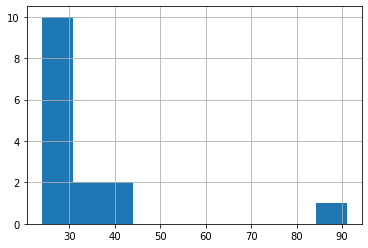

In [12]:
# finding outliers 
company['Measure_X'].hist()  # Assignment 02,Q1 Descriptive Statistics and Probability

In [13]:
# finding outlier ,outlier is 91
company.sort_values(by=['Measure_X'],ascending=False)     # Assignment 02,Q1 Descriptive Statistics and Probability

,Name_of_company,Measure_X
10,Morgan Stanley,91
8,Merrill Lynch,40
12,Travelers,39
14,Warner-Lambert,35
9,Microsoft,32
4,J.P.Morgan & Co.,29
5,Lehman Brothers,28
13,US Airways,26
1,Bankers Trust,25
2,General Mills,25


In [14]:
1-stats.norm.cdf(60,loc=55,scale=8)   # Assignment 02,Q1, Set+2_Normal+Distribution+Functions+of+random+variables

0.26598552904870054

Q5. Consider a company that has two different divisions. The annual profits from the two divisions are independent 
and have distributions Profit1 ~ N(5, 3^2) and Profit2 ~ N(7, 4^2) respectively. 
Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. 
Assume that $1 = Rs. 45
A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
B.	Specify the 5th percentile of profit (in Rupees) for the company
C.	Which of the two divisions has a larger probability of making a loss in a given year?

In [15]:
# two mean
mean = 5+7
mean*45   # in millions          # Assignment 02,Q5, Set+2_Normal+Distribution+Functions+of+random+variables

540

In [16]:
# SD in sqr 3^2  ,  4^2
SD =np.sqrt((9)+(16))
SD*45    # in millions            # Assignment 02,Q5, Set+2_Normal+Distribution+Functions+of+random+variables

225.0

In [17]:
# A.Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
stats.norm.interval(0.95,540,225)

# Assignment 02,Q5, Set+2_Normal+Distribution+Functions+of+random+variables

(99.00810347848784, 980.9918965215122)

In [18]:
#B.Specify the 5th percentile of profit (in Rupees) for the company
# from z table, 5 percentile = -1.645 ,   formula X=μ + Zσ

x = 540 + (-1.645 * 225)          # Assignment 02,Q5, Set+2_Normal+Distribution+Functions+of+random+variables
print('5th percentile of profit (in Rupees) for the company :',x)

5th percentile of profit (in Rupees) for the company : 169.875


In [19]:
# C.which of the two divisions has a larger probability of making a loss in a given year?

stats.norm.cdf(0,5,3)                   # Assignment 02,Q5, Set+2_Normal+Distribution+Functions+of+random+variables

0.0477903522728147

In [20]:
stats.norm.cdf(0,7,4)                  # Assignment 02,Q5, Set+2_Normal+Distribution+Functions+of+random+variables

0.040059156863817086

In [21]:
# One-Tail z-test   z_scores = (p̂-p)/√(p(1-p)/n) ...N(0,1)
z_scores=(0.046-0.05)/(np.sqrt((0.05*(1-0.05))/2000))      # Assignment 02, Set+3 , Q5
z_scores

-0.820782681668124

In [22]:
#  assuming null hyposthesis, so as to compare with Type-1 error α = 0.05
output=1-stats.norm.cdf(abs(z_scores))        # Assignment 02, Set+3 , Q5
output

0.20588503245107104

In [71]:
# z=(x-mean)/sigma
z =5/40/np.sqrt(100)      # Assignment 02, Set+4 , Q3
z
#The probability of z between those values is 0.7887

0.0125

In [72]:
1-stats.norm.cdf(0.7887)   # Assignment 02, Set+4 , Q3

0.21514368396389083

In [79]:
sd = 120/np.sqrt(40000)    # Assignment 02, Set+4 , Q5

In [80]:
 sd        # Assignment 02, Set+4 , Q5

0.6